In [1]:
import requests as rs
import pandas as pd
import seaborn as sns

In [2]:
def createMovieList():
    movieLists = []
    currentPg = 1
    while currentPg != 500:
        findAllMovies = 'https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&with_genre=28&page=' + str(currentPg)
        movieInformation = rs.get(findAllMovies)
        movieInformation = movieInformation.json()
        for movie in movieInformation['results']:
            if 28 in movie['genre_ids']:
                movieLists.append(movie)
        currentPg = currentPg + 1
    return movieLists

In [3]:
movieLists = createMovieList()

In [4]:
def createDirectorsRevenueList(movieLists):
    listOfDirectorsRevenue = []
    for movies in movieLists:
        movieId = movies['id']
        title = movies['title']
        
        findDirector = 'https://api.themoviedb.org/3/movie/'+str(movieId)+'/credits?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
        credits = rs.get(findDirector)
        credits = credits.json()
            
        for crewMember in credits['crew']:
            if crewMember['job'] == 'Director':
                director = crewMember['name']
                    
        findRevenue = 'https://api.themoviedb.org/3/movie/'+str(movieId)+'?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
        revenue = rs.get(findRevenue)
        revenue = revenue.json()
            
        profit = revenue['revenue']
            
        template = {'Director':director, "Revenue":profit, "Title":title}
        listOfDirectorsRevenue.append(template)
    return listOfDirectorsRevenue

In [5]:
listOfDirectorsRevenue = createDirectorsRevenueList(movieLists)

In [6]:
def sortByHighestRevenue(list):
    length = len(list)
    swapped = True
    start = 0
    end = length - 1
    while swapped == True:
        swapped = False
           
        for i in range (start, end):
            if list[i]['Revenue'] < list[i+1]['Revenue']:
                list[i], list[i+1] = list[i+1], list[i]
                swapped = True
      
        if swapped == False:
            break
        
        swapped = False
        
        end = end - 1
        
        for i in range (end-1, start-1, -1):
            if list[i]['Revenue'] < list[i+1]['Revenue']:
                list[i], list[i+1] = list[i+1], list[i]
                swapped = True
            
        start = start + 1
    
    return list

In [7]:
def highestRevenue(listOfDirectorsRevenue):
    finalList = []
    directorNames = []
        
    sortedListOfDirectorsRevenue = sortByHighestRevenue(listOfDirectorsRevenue)
        
    for movie in sortedListOfDirectorsRevenue:
        if movie['Director'] not in directorNames:
            directorNames.append(movie['Director'])
            finalList.append(movie)
    return finalList

In [8]:
finalList = highestRevenue(listOfDirectorsRevenue)

In [9]:
questionOneDF = pd.DataFrame(finalList)

In [10]:
topDirectors = questionOneDF.sort_values(by="Revenue", ascending = False)

In [11]:
topTenDirectors = topDirectors[:10]

In [12]:
topTenDirectors

,Director,Revenue,Title
0,James Cameron,2920357254,Avatar
1,Joe Russo,2797800564,Avengers: Endgame
2,J.J. Abrams,2068223624,Star Wars: The Force Awakens
3,Jon Watts,1916050941,Spider-Man: No Way Home
4,Colin Trevorrow,1671713208,Jurassic World
5,Joss Whedon,1518815515,The Avengers
6,James Wan,1515047671,Furious 7
7,Joseph Kosinski,1482656000,Top Gun: Maverick
8,Ryan Coogler,1347597973,Black Panther
9,Rian Johnson,1332698830,Star Wars: The Last Jedi


In [13]:
questionOneDF["Revenue"].quantile(0.999999999999)

2920357253.8529224

<AxesSubplot:xlabel='Revenue', ylabel='Director'>

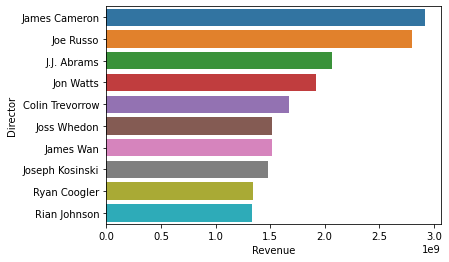

In [14]:
sns.barplot(data = topTenDirectors, x = "Revenue", y = "Director")

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

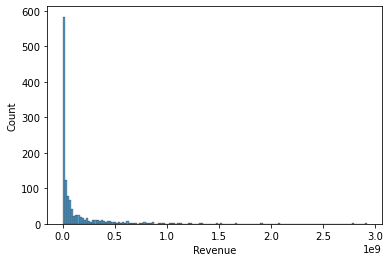

In [15]:
sns.histplot(questionOneDF["Revenue"])

In [16]:
def averageRevenue (listOfDirectorsRevenue):
    checkIfRepeating = []
    averageList = []
    checkingIfAlreadyAveraged = []
    finalListAverage = []
    
    for detailsForCIR in listOfDirectorsRevenue:
        checkIfRepeating.append(detailsForCIR['Director'])
        
    for directors in listOfDirectorsRevenue:
        if (checkIfRepeating.count(directors['Director']) > 1) and (directors['Director'] not in checkingIfAlreadyAveraged):
            checkingIfAlreadyAveraged.append(directors['Director'])
            for revenues in listOfDirectorsRevenue:
                if revenues['Director'] == directors['Director']:
                    averageList.append(revenues['Revenue'])
            averageProfit = sum(averageList) / len(averageList)
            template = {'Director':directors['Director'], "Avg. Revenue":averageProfit, "Title":directors['Title']}
            averageList = []
            finalListAverage.append(template)
        elif checkIfRepeating.count(directors['Director']) == 1:
            template = {'Director':directors['Director'], "Avg. Revenue":directors['Revenue'], "Title":directors['Title']}
            finalListAverage.append(template)
    return finalListAverage

In [17]:
finalListAverage = averageRevenue(listOfDirectorsRevenue)

In [18]:
questionTwoDF = pd.DataFrame(finalListAverage)

In [19]:
topAverageDirectors = questionTwoDF.sort_values(by="Avg. Revenue", ascending = False)

In [20]:
topTenAverageDirectors = topAverageDirectors[:10]

In [21]:
topTenAverageDirectors

,Director,Avg. Revenue,Title
1,Joe Russo,1.342429e+09,Avengers: Endgame
4,Colin Trevorrow,1.336357e+09,Jurassic World
10,J. A. Bayona,1.310466e+09,Jurassic World: Fallen Kingdom
3,Jon Watts,1.309382e+09,Spider-Man: No Way Home
14,Anna Boden,1.128276e+09,Captain Marvel
21,Rob Marshall,1.045714e+09,Pirates of the Caribbean: On Stranger Tides
22,Pierre Coffin,1.031553e+09,Despicable Me 3
5,Joss Whedon,9.876962e+08,The Avengers
23,Jake Kasdan,9.621022e+08,Jumanji: Welcome to the Jungle
6,James Wan,8.935168e+08,Furious 7


In [22]:
questionTwoDF["Avg. Revenue"].quantile(0.999999999999)

1342428853.7927127

<AxesSubplot:xlabel='Avg. Revenue', ylabel='Director'>

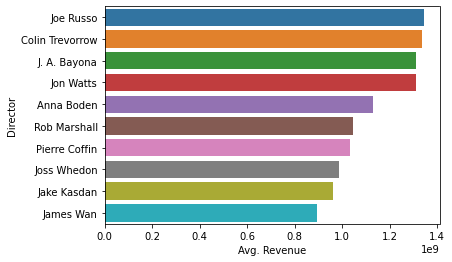

In [23]:
sns.barplot(data = topTenAverageDirectors, x = "Avg. Revenue", y = "Director")

<AxesSubplot:xlabel='Avg. Revenue', ylabel='Count'>

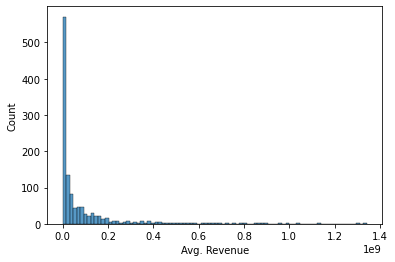

In [24]:
sns.histplot(questionTwoDF["Avg. Revenue"])

In [25]:
def createActorsRevenueList(movieLists):
    listOfActorsRevenue = []
    for movies in movieLists:
        movieId = movies['id']        
        findActor = 'https://api.themoviedb.org/3/movie/'+str(movieId)+'/credits?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
        credits = rs.get(findActor)
        credits = credits.json()
        findRevenue = 'https://api.themoviedb.org/3/movie/'+str(movieId)+'?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
        revenue = rs.get(findRevenue)
        revenue = revenue.json()
        profit = revenue['revenue']
        for person in credits['cast']:
            if person['known_for_department'] == 'Acting':
                template = {'Actor':person['name'], "Revenue":profit}
                listOfActorsRevenue.append(template)
    return listOfActorsRevenue

In [26]:
listOfActorsRevenue = createActorsRevenueList(movieLists)

In [27]:
def highestActorRevenue (listOfActorsRevenue):
    checkIfRepeating = []
    totalList = []
    checkingIfAlreadyTotalled = []
    finalActorList = []
    
    
    for detailsForCIR in listOfActorsRevenue:
        checkIfRepeating.append(detailsForCIR['Actor'])
        
        
        
    for actors in listOfActorsRevenue:
        if (checkIfRepeating.count(actors['Actor']) > 1) and (actors['Actor'] not in checkingIfAlreadyTotalled):
            checkingIfAlreadyTotalled.append(actors['Actor'])
            for revenues in listOfActorsRevenue:
                if revenues['Actor'] == actors['Actor']:
                    totalList.append(revenues['Revenue'])
            totalProfit = sum(totalList)
            template = {'Actor':actors['Actor'], "Total Revenue":totalProfit}
            totalList = []
            finalActorList.append(template)
        elif checkIfRepeating.count(actors['Actor']) == 1:
            template = {'Actor':actors['Actor'], "Total Revenue":totalProfit}
            finalActorList.append(template)
    return finalActorList

In [28]:
finalActorList = highestActorRevenue(listOfActorsRevenue)

In [29]:
questionThreeDF = pd.DataFrame(finalActorList)

In [30]:
topActors = questionThreeDF.sort_values(by="Total Revenue", ascending = False)

In [31]:
topTenActors = topActors[:10]

In [32]:
topTenActors

,Actor,Total Revenue
932,Samuel L. Jackson,22929582846
882,Chris Evans,14378126107
926,Vin Diesel,14257138663
881,Robert Downey Jr.,13666596822
885,Scarlett Johansson,13459783698
889,Benedict Cumberbatch,13228871767
148,Andy Serkis,12921584880
884,Chris Hemsworth,12500535325
883,Mark Ruffalo,11990003359
931,Chris Pratt,11922594043


In [33]:
questionThreeDF["Total Revenue"].quantile(0.999999999999)

22929582422.90375

<AxesSubplot:xlabel='Total Revenue', ylabel='Actor'>

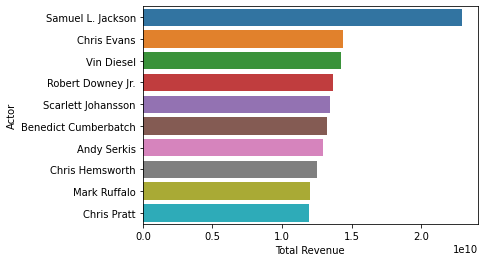

In [34]:
sns.barplot(data = topTenActors, x = "Total Revenue", y = "Actor")

<AxesSubplot:xlabel='Total Revenue', ylabel='Count'>

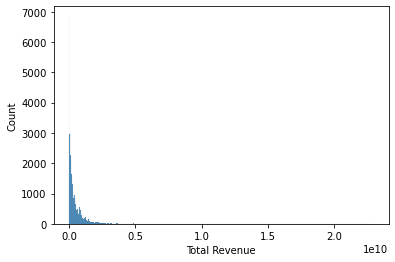

In [35]:
sns.histplot(questionThreeDF["Total Revenue"])

In [36]:
def averageActorRevenue (listOfActorsRevenue):
    checkIfRepeating = []
    averageList = []
    checkingIfAlreadyAveraged = []
    finalActorListAverage = []
    
    for detailsForCIR in listOfActorsRevenue:
        checkIfRepeating.append(detailsForCIR['Actor'])
        
    for actors in listOfActorsRevenue:
        if (checkIfRepeating.count(actors['Actor']) > 1) and (actors['Actor'] not in checkingIfAlreadyAveraged):
            checkingIfAlreadyAveraged.append(actors['Actor'])
            for revenues in listOfActorsRevenue:
                if revenues['Actor'] == actors['Actor']:
                    averageList.append(revenues['Revenue'])
            averageProfit = sum(averageList) / len(averageList)
            template = {'Actor':actors['Actor'], "Avg. Revenue":averageProfit}
            averageList = []
            finalActorListAverage.append(template)
        elif checkIfRepeating.count(actors['Actor']) == 1:
            template = {'Actor':actors['Actor'], "Avg. Revenue":actors['Revenue']}
            finalActorListAverage.append(template)
    return finalActorListAverage

In [37]:
finalActorListAverage = averageActorRevenue(listOfActorsRevenue)

In [38]:
questionFourDF = pd.DataFrame(finalActorListAverage)

In [39]:
topAverageActors = questionFourDF.sort_values(by="Avg. Revenue", ascending = False)

In [40]:
topTenAverageActors = topAverageActors[:10]

In [41]:
topTenAverageActors

,Actor,Avg. Revenue
6540,Kyla Warren,2.920357e+09
6542,Kyle Dryberg,2.920357e+09
6524,Sean Anthony Moran,2.920357e+09
6525,Jason Whyte,2.920357e+09
6527,James Patrick Pitt,2.920357e+09
6528,Sean Patrick Murphy,2.920357e+09
6530,Kelson Henderson,2.920357e+09
6531,David Van Horn,2.920357e+09
6532,Jacob Tomuri,2.920357e+09
6536,Luke Hawker,2.920357e+09


In [42]:
questionFourDF["Avg. Revenue"].quantile(0.999999999999)

2920357254.0

<AxesSubplot:xlabel='Avg. Revenue', ylabel='Actor'>

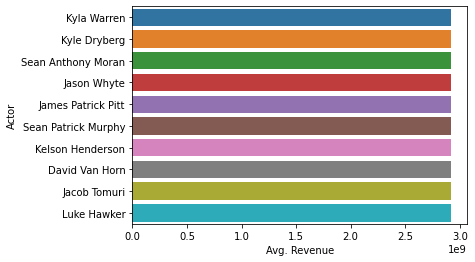

In [43]:
sns.barplot(data = topTenAverageActors, x = "Avg. Revenue", y = "Actor")

<AxesSubplot:xlabel='Avg. Revenue', ylabel='Count'>

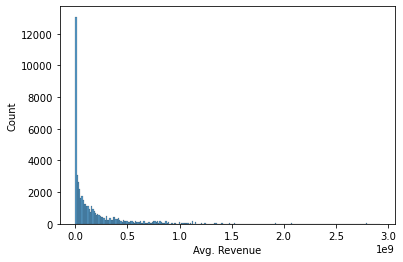

In [44]:
sns.histplot(questionFourDF["Avg. Revenue"])

In [45]:
getAllGenres = 'https://api.themoviedb.org/3/genre/movie/list?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
genres = rs.get(getAllGenres)
genres = genres.json()

In [46]:
def isActionEvenGood (genres):
    genreRevenueList = []
    currentPg = 1
    while currentPg != 500:
        findAllMovies = 'https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&with_genre=28&page=' + str(currentPg)
        movieInformation = rs.get(findAllMovies)
        movieInformation = movieInformation.json()
        for movie in movieInformation['results']:
            for genre in movie['genre_ids']:
                for id in genres['genres']:
                    if genre == id['id']:
                        name = id['name']
                template = {'Genre':name, 'ID':movie['id']}
                genreRevenueList.append(template)
        currentPg = currentPg + 1
    return genreRevenueList

In [47]:
x = isActionEvenGood (genres)

In [48]:
print(x)

[{'Genre': 'Drama', 'ID': 238}, {'Genre': 'Crime', 'ID': 238}, {'Genre': 'Drama', 'ID': 278}, {'Genre': 'Crime', 'ID': 278}, {'Genre': 'Drama', 'ID': 240}, {'Genre': 'Crime', 'ID': 240}, {'Genre': 'Romance', 'ID': 851644}, {'Genre': 'Drama', 'ID': 851644}, {'Genre': 'Drama', 'ID': 424}, {'Genre': 'History', 'ID': 424}, {'Genre': 'War', 'ID': 424}, {'Genre': 'Comedy', 'ID': 19404}, {'Genre': 'Drama', 'ID': 19404}, {'Genre': 'Romance', 'ID': 19404}, {'Genre': 'Animation', 'ID': 129}, {'Genre': 'Family', 'ID': 129}, {'Genre': 'Fantasy', 'ID': 129}, {'Genre': 'Drama', 'ID': 389}, {'Genre': 'Romance', 'ID': 372058}, {'Genre': 'Animation', 'ID': 372058}, {'Genre': 'Drama', 'ID': 372058}, {'Genre': 'Animation', 'ID': 555604}, {'Genre': 'Fantasy', 'ID': 555604}, {'Genre': 'Drama', 'ID': 555604}, {'Genre': 'Romance', 'ID': 372754}, {'Genre': 'Animation', 'ID': 372754}, {'Genre': 'Comedy', 'ID': 496243}, {'Genre': 'Thriller', 'ID': 496243}, {'Genre': 'Drama', 'ID': 496243}, {'Genre': 'Fantasy', 

In [49]:
def turnIDToRevenue (x):
    y = []
    for grouping in x:
        findRevenue = 'https://api.themoviedb.org/3/movie/'+str(grouping['ID'])+'?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US'
        revenue = rs.get(findRevenue)
        revenue = revenue.json()
        template = {'Genre':grouping['Genre'], 'Revenue':revenue['revenue']}
        y.append(template)
    return y

In [ ]:
z = turnIDToRevenue(x)

In [ ]:
print(z)

In [ ]:
def combinedRevenue (z):
    temp = []
    final = []
    for val in z:
        if val['Genre'] not in temp:
            temp.append(val['Genre'])

    for genre in temp:
        total = 0
        for revenue in z:
            if revenue['Genre'] == genre:
                total = total + revenue['Revenue']
        template = {'Genre':genre, 'Total Revenue':total}
        final.append(template)
    return(final)

In [ ]:
final = combinedRevenue (z)

In [ ]:
questionFiveDF = pd.DataFrame(final)

In [ ]:
questionFiveDF.head()

In [ ]:
df = questionFiveDF.sort_values(by="Total Revenue", ascending = False)